In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from statsmodels.stats.contingency_tables import Table
from scipy import stats
import copy
import math

In [2]:
K = 17
L = len("Frem")
fname1 = ((K*L*23) % (20)) + 1
fname2 = ((fname1 + ((K*5 + L*7) % (19))) % (20)) + 1
print(f'X:{fname1}\nY:{fname2}')

X:5
Y:4


# 1 
Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte základní charakteristiky délek slov, tj. střední hodnotu a rozptyl. Graficky znázorněte rozdělení délek slov.

In [3]:
file1 = open(f'hw1-source/00{fname1}.txt','r')
file2 = open(f'hw1-source/00{fname2}.txt','r')

file1 = file1.read()
file1_words = file1.split()
file2 = file2.read()
file2_words = file2.split()

In [4]:
wordlens_file1 = [(lambda x: len(x))(x) for x in file1_words]
wordlens_file2 = [(lambda x: len(x))(x) for x in file2_words]

mean1 = np.mean(wordlens_file1)
mean2 = np.mean(wordlens_file2)

var1 = np.var(wordlens_file1, ddof=1)
var2 = np.var(wordlens_file2, ddof=1)

print(f'První text:\n\tstřední hodnota: {mean1}\n\trozptyl: {var1}\nDruhý text:\n\tstřední hodnota: {mean2}\n\trozptyl: {var2}')

První text:
	střední hodnota: 4.023041474654378
	rozptyl: 4.526221368204466
Druhý text:
	střední hodnota: 4.447342995169082
	rozptyl: 5.794855119184444


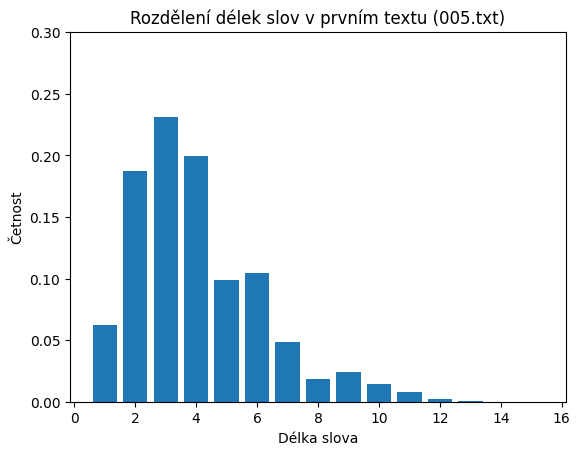

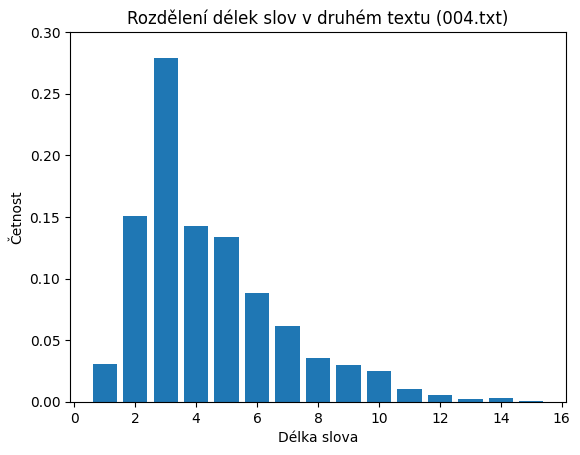

In [5]:
word_probs1 = list(np.unique(wordlens_file1, return_counts=True)[1]/len(wordlens_file1))
word_probs2 = list(np.unique(wordlens_file2, return_counts=True)[1]/len(wordlens_file2))
barcount = max(len(word_probs1),len(word_probs2))
word_probs1 = np.pad(word_probs1,(0, barcount - len(word_probs1)), 'constant', constant_values=(0, 0))
word_probs2 = np.pad(word_probs2,(0, barcount - len(word_probs2)), 'constant', constant_values=(0, 0))

plt.title("Rozdělení délek slov v prvním textu (005.txt)")
plt.bar(range(1,barcount+1),word_probs1)
plt.xlabel("Délka slova")
plt.ylabel("Četnost")
plt.ylim(0, 0.3)
plt.show()
plt.title("Rozdělení délek slov v druhém textu (004.txt)")
plt.bar(range(1,barcount+1),word_probs2)
plt.xlabel("Délka slova")
plt.ylabel("Četnost")
plt.ylim(0, 0.3)
plt.show()

# 2 
Pro každý text zvlášť odhadněte pravděpodobnosti písmen (symbolů mimo mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.

In [6]:
def countFreqs(to_cnt):
    char_cnt = {}
    for i in to_cnt.lower():
        if not char_cnt.get(i):
            char_cnt[i] = 1
        else:
            char_cnt[i] += 1
    return char_cnt

def countProbs(to_cnt):
    to_ret = {}
    char_cnt = countFreqs(to_cnt)
    for i in char_cnt.keys():
        to_ret[i] = char_cnt[i]/len(to_cnt)
    return to_ret

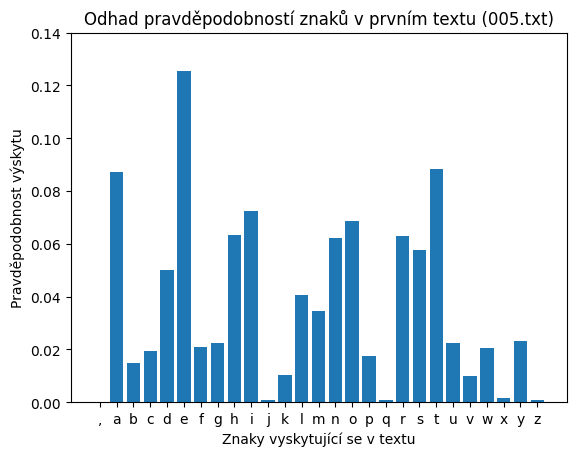

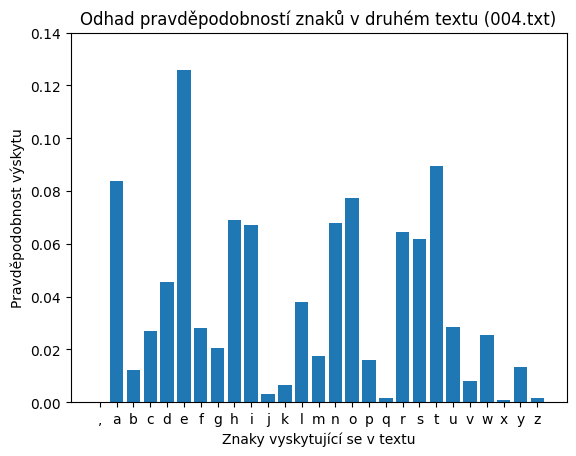

In [7]:
f1_probs = dict(sorted(countProbs("".join(file1.split())).items()))
f2_probs = dict(sorted(countProbs("".join(file2.split())).items()))


plt.bar(range(len(f1_probs)), list(f1_probs.values()), align='center')
plt.xticks(range(len(f1_probs)), list(f1_probs.keys()))
plt.title("Odhad pravděpodobností znaků v prvním textu (005.txt)")
plt.xlabel("Znaky vyskytující se v textu")
plt.ylabel("Pravděpodobnost výskytu")
plt.ylim(0, 0.14)
plt.show()

plt.bar(range(len(f2_probs)), list(f2_probs.values()), align='center')
plt.xticks(range(len(f2_probs)), list(f2_probs.keys()))
plt.title("Odhad pravděpodobností znaků v druhém textu (004.txt)")
plt.xlabel("Znaky vyskytující se v textu")
plt.ylabel("Pravděpodobnost výskytu")
plt.ylim(0, 0.14)
plt.show()

# 3
Na hladině významnosti 5% otestujte hypotézu, že rozdělení délek slov nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

In [8]:
#kontingencni tabulka
wordlens_arr_file1 = np.unique(wordlens_file1, return_counts=True)[1]
wordlens_arr_file2 = np.unique(wordlens_file2, return_counts=True)[1]
cont_tab = np.zeros((2,max(wordlens_arr_file1.size,wordlens_arr_file2.size)))
np.put(cont_tab[0],np.arange(wordlens_arr_file1.size),wordlens_arr_file1)
np.put(cont_tab[1],np.arange(wordlens_arr_file2.size),wordlens_arr_file2)
print(cont_tab)

[[ 68. 203. 251. 216. 107. 113.  53.  20.  26.  16.   9.   2.   1.   0.
    0.]
 [ 32. 156. 289. 148. 138.  91.  64.  37.  31.  26.  11.   6.   2.   3.
    1.]]


In [9]:
#teoreticke cetnosti
theoretic_occur = Table(copy.deepcopy(cont_tab)).fittedvalues
sum(sum(theoretic_occur<=5))

8

In [10]:
#Sloucime sloupce kde jsou teoreticke cetnosti mensi nez 5
cols_to_merge = max(sum(theoretic_occur[1]<5),sum(theoretic_occur[0]<5))
cont_tab[0][-cols_to_merge] = np.sum(cont_tab[0,-cols_to_merge:])
cont_tab[1][-cols_to_merge] = np.sum(cont_tab[1,-cols_to_merge:])
cont_tab = cont_tab[:,:-cols_to_merge+1]
print(cont_tab)

[[ 68. 203. 251. 216. 107. 113.  53.  20.  26.  16.   9.   3.]
 [ 32. 156. 289. 148. 138.  91.  64.  37.  31.  26.  11.  12.]]


In [11]:
#overime ze teoreticke cetnosti jsou vetsi nez 5
theoretic_occur = Table(copy.deepcopy(cont_tab)).fittedvalues
sum(sum(theoretic_occur<=5))

0

In [23]:
#Spocitame Chi2
Chi2, p, df, _ = stats.chi2_contingency(cont_tab, correction=False)
print(f'Chi2: {Chi2}, počet stupňů volnosti: {df}, p-hodnota: {p}')

Chi2: 54.1603657640849, počet stupňů volnosti: 11, p-hodnota: 1.103456624912432e-07


# 4

In [41]:
#Levenuv test - chceme zjistit, jestli se rozptyly rovnaji nebo ne
stat, p = stats.levene(wordlens_file1, wordlens_file2)
print(f'Levenův test: p-hodnota: {p}')

Levenův test: p-hodnota: 0.005690476891937294


In [38]:
#rozptyly se nerovnaji - dvouvyberovy t-test
tt_s, tt_p = stats.ttest_ind(wordlens_file1, wordlens_file2, alternative='two-sided', equal_var=False)
print(f'Testová statistika: {tt_s}, p-hodnota: {tt_p}')

Testová statistika: -4.292552407175119, p-hodnota: 1.8482670310976925e-05


In [40]:
#kriticky obor
n = len(wordlens_file1)
m = len(wordlens_file2)
s_x_2 = var1
s_y_2 = var2
s_d_2 = s_x_2/n+s_y_2/m
n_d = (s_d_2**2) / ((1/(n-1))*((s_x_2/n)**2) + (1/(m-1))*((s_y_2/m)**2))
t = stats.t.isf(0.05/2,n_d)
print(f't-rozdělení: {t}')

t-rozdělení: 1.961116971124656


# 5 

In [27]:
#vyrobime kontingencni tabulku
letter_freqs_arr_file1 =  np.fromiter(dict(sorted(countFreqs("".join(file1.split())).items())).values(),dtype=float)
letter_freqs_arr_file2 = np.fromiter(dict(sorted(countFreqs("".join(file2.split())).items())).values(),dtype=float)
cont_tab = np.zeros((2,max(letter_freqs_arr_file1.size,letter_freqs_arr_file2.size)))
np.put(cont_tab[0],np.arange(letter_freqs_arr_file1.size),letter_freqs_arr_file1)
np.put(cont_tab[1],np.arange(letter_freqs_arr_file2.size),letter_freqs_arr_file2)

print(cont_tab)

[[  1. 381.  65.  85. 219. 547.  91.  98. 276. 316.   3.  45. 178. 151.
  272. 299.  77.   4. 275. 252. 386.  98.  44.  90.   7. 102.   3.]
 [  1. 385.  56. 125. 209. 579. 129.  95. 317. 309.  14.  30. 175.  80.
  313. 356.  73.   8. 296. 285. 411. 131.  37. 117.   4.  61.   7.]]


In [28]:
#teoreticke cetnosti
theoretic_occur = Table(copy.deepcopy(cont_tab)).fittedvalues
print(sum(sum(theoretic_occur<=5)))
print(theoretic_occur)

3
[[  0.9734612  372.83563782  58.89440232 102.21342551 208.32069581
  548.05865299 107.08073149  93.93900535 288.63124442 304.20662355
    8.27442016  36.50479483 171.81590098 112.43476806 284.73739964
  318.80854148  73.00958965   5.84076717 277.92317128 261.37433095
  387.92428635 111.46130687  39.42517841 100.75323372   5.35403657
   79.33708742   4.86730598]
 [  1.0265388  393.16436218  62.10559768 107.78657449 219.67930419
  577.94134701 112.91926851  99.06099465 304.36875558 320.79337645
    8.72557984  38.49520517 181.18409902 118.56523194 300.26260036
  336.19145852  76.99041035   6.15923283 293.07682872 275.62566905
  409.07571365 117.53869313  41.57482159 106.24676628   5.64596343
   83.66291258   5.13269402]]


In [29]:
#secteme nejmensi, ted to delame rucne
cont_tab[:,cont_tab.shape[1]-1] += cont_tab[:,0]
cont_tab = cont_tab[:,1:]
print(cont_tab)

[[381.  65.  85. 219. 547.  91.  98. 276. 316.   3.  45. 178. 151. 272.
  299.  77.   4. 275. 252. 386.  98.  44.  90.   7. 102.   4.]
 [385.  56. 125. 209. 579. 129.  95. 317. 309.  14.  30. 175.  80. 313.
  356.  73.   8. 296. 285. 411. 131.  37. 117.   4.  61.   8.]]


In [30]:
#overime ze teoreticke cetnosti jsou vetsi nez 5
theoretic_occur = Table(copy.deepcopy(cont_tab)).fittedvalues
sum(sum(theoretic_occur<=5))

0

In [31]:
#Spocitame Chi2
Chi2, p, df, _ = stats.chi2_contingency(cont_tab, correction=False)
print(f'Chi2: {Chi2}, počet stupňů volnosti: {df}, p-hodnota: {p}')

Chi2: 78.88559759637619, počet stupňů volnosti: 25, p-hodnota: 1.7041501875029103e-07
